# Mini Project 2
Description: https://docs.google.com/document/d/180S9oUpU1teR5BFXOQArYaC824uDKkXj7bnS3TZAcQw/edit?usp=sharing

## Part A - Question Set 1

### 1. **Cluster identification**:  Is it possible to group the foods into distinct clusters according to how similar they are across all macronutrients, vitamins and minerals quantities recorded in the data?

#### Import package and data and process data

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
alt.data_transformers.enable(max_rows=250000)
pd.set_option('display.max_columns', None)
data= pd.read_csv(filepath_or_buffer = 'usda-grp-nomiss.csv', sep=',', low_memory=False,header=0, index_col=None, lineterminator='\n')

data = data.replace(np.nan,0)
data.head(5)

,Unnamed: 0,NDB_No,FdGrp_CD,FdGrp_Desc,Shrt_Desc,Water,Energ_Kcal,Protein,Lipid_Tot,Ash,Carbohydrt,Fiber_TD,Sugar_Tot,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vit_C,Thiamin,Riboflavin,Niacin,Panto_Acid,Vit_B6,Folate_Tot.,Folic_Acid,Food_Folate,Folate_DFE,Choline_Tot,Vit_B12,Vit_A_IU,Vit_A_RAE,Retinol,Alpha_Carot,Beta_Carot,Beta_Crypt,Lycopene,Lut.Zea,Vit_E,Vit_D,Vit_D.1,Vit_K,FA_Sat,FA_Mono,FA_Poly,Cholestrl,GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1,1001,100,Dairy and Egg Products,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24,0.02,2,24,24,714,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3,0,3,3,18.8,0.17,2499,684,671,0,158,0,0,0,2.32,1.5,60,7.0,51.368,21.021,3.043,215,227.00,1 cup,14.2,1 tbsp,0
1,2,1002,100,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24,0.16,2,23,26,827,0.05,0.016,0.004,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3,0,3,3,18.8,0.13,2499,684,671,0,158,0,0,0,2.32,1.5,60,7.0,50.489,23.426,3.012,219,151.00,1 cup,9.4,1 tbsp,0
2,3,1003,100,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4,0.00,0,3,5,2,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0,0,0,0,22.3,0.01,3069,840,824,0,193,0,0,0,2.80,1.8,73,8.6,61.924,28.732,3.694,256,205.00,1 cup,12.8,1 tbsp,0
3,4,1004,100,Dairy and Egg Products,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528,0.31,23,387,256,1395,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36,0,36,36,15.4,1.22,763,198,192,0,74,0,0,0,0.25,0.5,21,2.4,18.669,7.778,0.800,75,28.35,1 oz,17.0,1 cubic inch,0
4,5,1005,100,Dairy and Egg Products,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674,0.43,24,451,136,560,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20,0,20,20,15.4,1.26,1080,292,286,0,76,0,0,0,0.26,0.5,22,2.5,18.764,8.598,0.784,94,132.00,"1 cup, diced",113.0,"1 cup, shredded",0


In [5]:
#data.count()

In [6]:
#group_name = ["Vegetables and Vegetable Products","Baked Products","Dairy and Egg Products","Beef Products","Fruits and Fruit Juices","Pork Products"]
group_name = ["Vegetables and Vegetable Products","Baked Products"]
data = data[data['FdGrp_Desc'].isin(group_name)]

data['FdGrp_Desc'].value_counts()

Vegetables and Vegetable Products    254
Baked Products                       223
Name: FdGrp_Desc, dtype: int64

#### Define category

In [7]:
macronu_col = ['Protein', 'Lipid_Tot','Carbohydrt','Water','Fiber_TD', "Cholestrl","Ash"]
vitamin_col = ['Vit_C', 'Vit_B6','Vit_B12','Vit_A_IU','Vit_A_RAE','Vit_E','Vit_D','Vit_D.1','Vit_K','Thiamin']
mineral_col = ['Calcium','Iron','Magnesium','Phosphorus','Potassium','Sodium','Zinc','Copper','Manganese','Selenium']

X_mac = data[macronu_col].values
X_vit = data[vitamin_col].values
X_min = data[mineral_col].values

#### Scalar 

In [8]:
scaler = StandardScaler()
scaler.fit(X_mac)
scaled_mac = scaler.transform(X_mac)

scaler.fit(X_vit)
scaled_vit = scaler.transform(X_vit)

scaler.fit(X_min)
scaled_min = scaler.transform(X_min)

#### Clustering - Kmeans

In [9]:
kmeans = KMeans(n_clusters=2,init='random',n_init=15,random_state=0,algorithm='elkan')
kmeans.fit(scaled_mac)
labels_mac = kmeans.predict(scaled_mac)

kmeans.fit(scaled_vit)
labels_vit = kmeans.predict(scaled_vit)

kmeans.fit(scaled_min)
labels_min = kmeans.predict(scaled_min)
#print(labels)

#### T-SNE

In [10]:
result_tsne_mac = TSNE(n_components=2, metric='manhattan').fit_transform(scaled_mac)
tsne_df_mac = pd.DataFrame(data=result_tsne_mac, columns=['x','y'])
tsne_df_mac['label_mac'] = labels_mac

result_tsne_vit = TSNE(n_components=2, metric='manhattan').fit_transform(scaled_vit)
tsne_df_vit = pd.DataFrame(data=result_tsne_vit, columns=['x','y'])
tsne_df_vit['label_vit'] = labels_vit

result_tsne_min = TSNE(n_components=2, metric='manhattan').fit_transform(scaled_min)
tsne_df_min = pd.DataFrame(data=result_tsne_min, columns=['x','y'])
tsne_df_min['label_min'] = labels_min

tsne_mac_chart = alt.Chart(tsne_df_mac).mark_point().encode(
    x='x:Q',
    y='y:Q',
    color='label_mac:N'
)
tsne_vit_chart = alt.Chart(tsne_df_vit).mark_point().encode(
    x='x:Q',
    y='y:Q',
    color='label_vit:N'
)
tsne_min_chart = alt.Chart(tsne_df_min).mark_point().encode(
    x='x:Q',
    y='y:Q',
    color='label_min:N'
)

#### MDS

In [11]:
result_mds_mac = MDS(n_components=2).fit_transform(scaled_mac)
mds_df_mac = pd.DataFrame(data=result_mds_mac, columns=['x','y'])

mds_df_mac['label_mac'] = labels_mac

mds_mac_chart =alt.Chart(mds_df_mac).mark_point().encode(
    x='x:Q',
    y='y:Q',
    color='label_mac:N'
)

### 2. **Clusters vs. labels**: Once a set of clusters has been found, how do the clusters compare to the food groups recorded in the data (e.g., Poultry, Dairy and Egg, Fruits)(see the field “FdGrp_Desc”)?
1. Do food belonging to the same food group fall in the same clusters?
2. Are there foods that belong to the same food group but fall into different clusters (that is, same food group but different food composition)?
3. Are there foods that belong to different groups but fall into the same cluster (that is, different food groups but similar food composition)?

In [18]:
tsne_df_mac['food_group'] = data['FdGrp_Desc'].values
tsne_df_min['food_group'] = data['FdGrp_Desc'].values
tsne_df_vit['food_group'] = data['FdGrp_Desc'].values

mac_group = alt.Chart(tsne_df_mac).mark_circle().encode(
    x='x:Q',
    y='y:Q',
    color=alt.Color('food_group:O', scale=alt.Scale(scheme='dark2'))
)

vit_group = alt.Chart(tsne_df_vit).mark_circle().encode(
    x='x:Q',
    y='y:Q',
    color=alt.Color('food_group:O', scale=alt.Scale(scheme='dark2'))
)
min_group = alt.Chart(tsne_df_min).mark_circle().encode(
    x='x:Q',
    y='y:Q',
    color=alt.Color('food_group:O', scale=alt.Scale(scheme='dark2'))
)

In [19]:
mds_df_mac['food_group'] = data['FdGrp_Desc'].values

mds_mac_group = alt.Chart(mds_df_mac).mark_circle().encode(
    x='x:Q',
    y='y:Q',
    color=alt.Color('food_group:O', scale=alt.Scale(scheme='dark2'))
)

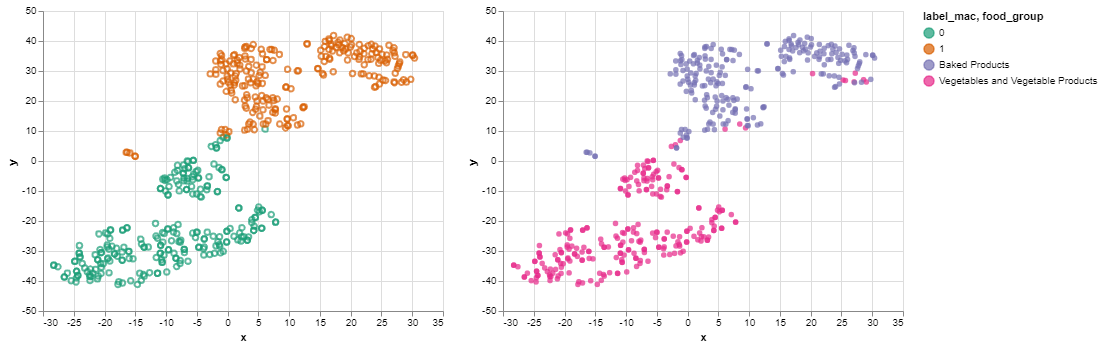

In [24]:
tsne_mac_chart | mac_group

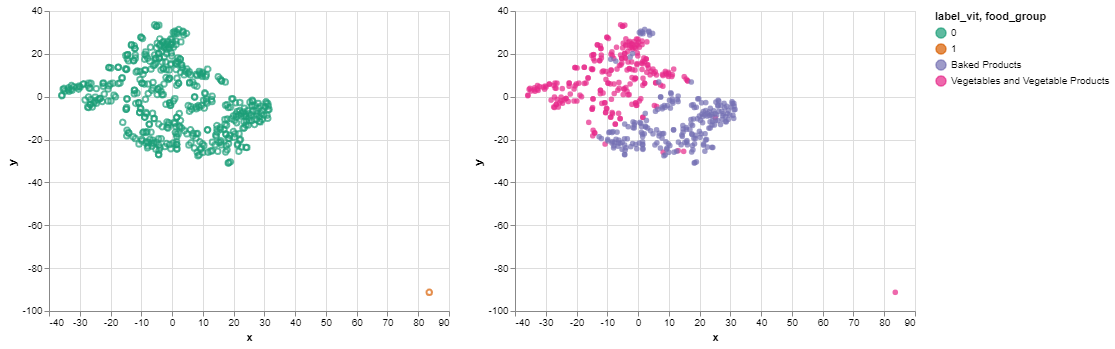

In [25]:
 tsne_vit_chart | vit_group

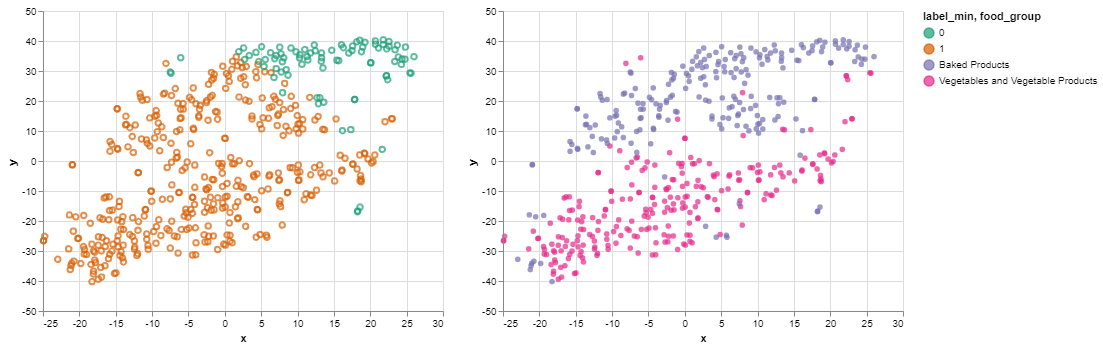

In [26]:
tsne_min_chart | min_group

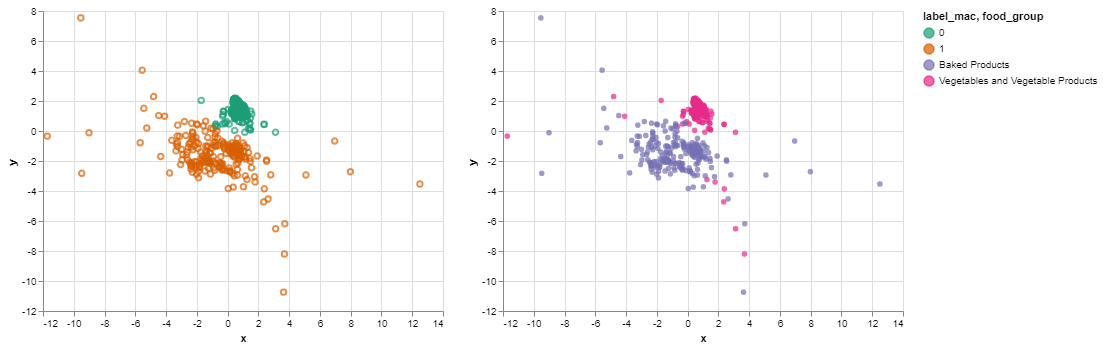

In [27]:
mds_mac_chart | mds_mac_group

### 3. **Outliers**: Are there any foods that tend to be different from all the others (that is, they are outliers)? What is unique about them? What makes them unique?

Yes, we can see when we cluster food by vitamin, there are outliers on the top left corner, which not belong
to any of the group. It is outlier since the value of its ['Vit_C', 'Vit_B6','Vit_B12','Vit_A_IU','Vit_A_RAE','Vit_E','Vit_D','Vit_D.1','Vit_K','Thiamin'] are
not close to either baked products, vegetables and vegetable products. 

### 4. **Interpretation**: For the clusters and outliers identified above, what aspects of their food composition make them different from the others and similar to the food that belong to the same cluster (that is, what makes a cluster (or outlier) unique in terms of their data values and distribution and how does it compare to the other clusters)?

Food in same cluster have closer distance to each other in the cluster than distance to food in other clusters. We can clearly
see it from the plot above. For the food in same cluster, they are hold together form a group. 